In [1]:
import numpy as np
from import_lib.func import sphere, ackley, rosenbrock
from import_lib.GA import population_init, skill_factor_best_task, factorial_cost, factorial_rank\
                            ,polynomial_mutation, sbx_crossover

In [2]:
print(ackley(3).func(np.array([1, 2, 3])))
print(sphere(3).func(np.array([1, 2, 3])))
print(rosenbrock(3).func(np.array([1, 2, 3])))

7.0164536082694
14
201


In [3]:
print(ackley(3).func(np.array([0, 0, 0])))
print(sphere(3).func(np.array([0, 0, 0])))
print(rosenbrock(3).func(np.array([1, 1, 1])))

4.440892098500626e-16
0
0


In [4]:
def mfea(num_epochs, num_inds, tasks = [], rmp = 0.1, nc = 15, nm = 15):
    max_d = 0
    for t in tasks:
        if max_d < t.d:
            max_d = t.d
    
    population, _ = population_init(int(num_inds/ len(tasks)), len(tasks), max_d)

    skill_factor = skill_factor_best_task(population, tasks)
    f_cost = factorial_cost(population, skill_factor, tasks)

    history = np.empty((0, len(tasks)), np.float)

    for epoch in range (num_epochs):
        child = np.empty((0, population.shape[1]))
        child_skill_factor = np.empty((0, 1), dtype=np.int)

        while len(child) < num_inds:
            [idx_a, idx_b] = np.random.randint(num_inds, size = 2)
            [pa, pb], [skf_a, skf_b] = population[[idx_a, idx_b]], skill_factor[[idx_a, idx_b]]

            if skf_a == skf_b or np.random.uniform() < rmp :
                ca, cb = sbx_crossover(pa, pb, nc)
                
                child = np.append(child, [ca, cb], axis = 0)
                child_skill_factor = np.append(child_skill_factor, [np.random.choice([skf_a, skf_b]) for i in range (2)])
            
            else:
                ca, cb = polynomial_mutation(pa, nm, all_dimensions=True), polynomial_mutation(pb, nm, all_dimensions=True)
                
                child = np.append(child, [ca, cb], axis = 0)
                child_skill_factor = np.append(child_skill_factor, [skf_a, skf_b])
        
        child_fcost = factorial_cost(child, child_skill_factor, tasks)

        large_pop = np.append(population, child, axis = 0)
        large_fcost = np.append(f_cost, child_fcost, axis = 0)
        large_skill_factor = np.append(skill_factor, child_skill_factor, axis = 0)

        large_scalar_fitness = 1/factorial_rank(large_fcost, large_skill_factor, len(tasks))
        
        selected_inds = np.argsort(-large_scalar_fitness)[:num_inds] 

        population = large_pop[selected_inds]
        skill_factor = large_skill_factor[selected_inds]
        f_cost = large_fcost[selected_inds]

        history = np.append(history, [[np.min(f_cost[np.where(skill_factor == idx)[0]]) for idx in range (len(tasks))]], axis = 0)
        
        print('Epoch [{}/{}], func_val: {}'
            .format(epoch + 1, num_epochs, [np.min(f_cost[np.where(skill_factor == idx)[0]]) for idx in range (len(tasks))])
        )
    
    sol_idx = [np.argmin(f_cost[np.where(skill_factor == idx)]) for idx in range (len(tasks))]
    return [population[np.where(skill_factor == idx)][sol_idx[idx]] for idx in range(len(tasks))], history

In [5]:
tasks = [sphere(30, limited_space= True, lower_bound=-100, upper_bound= 100), 
        ackley(50, limited_space= True, lower_bound=-100, upper_bound= 100), 
        rosenbrock(20, limited_space= True, lower_bound=-100, upper_bound= 100), 
        rosenbrock(30, limited_space= True, lower_bound=-100, upper_bound= 100)]


In [10]:
sol, his = mfea(num_epochs= 2000, num_inds= 400, tasks= tasks, rmp= 0.3, nc = 15, nm = 15)

Epoch [1/2000], func_val: [42995.30127021231, 21.27543060169449, 9937368049.26408, 27046698888.640923]
Epoch [2/2000], func_val: [33508.61231049387, 21.27543060169449, 8001314663.1064, 16870548504.465094]
Epoch [3/2000], func_val: [33157.65192733407, 21.27543060169449, 7296312017.943248, 9376827925.35983]
Epoch [4/2000], func_val: [25380.826418078308, 21.27543060169449, 4906160621.134686, 9376827925.35983]
Epoch [5/2000], func_val: [25380.826418078308, 21.273468912002524, 4511678989.127921, 7958188896.008251]
Epoch [6/2000], func_val: [23824.746894004595, 21.273468912002524, 2506671723.0893235, 7705466728.36184]
Epoch [7/2000], func_val: [23645.414608198553, 21.273468912002524, 2506236516.1063623, 2637828166.423513]
Epoch [8/2000], func_val: [21401.150232933374, 21.273468912002524, 2397438893.2156286, 2016585938.7109227]
Epoch [9/2000], func_val: [20459.719839302383, 21.273468912002524, 1602881569.2011192, 2016585938.7109227]
Epoch [10/2000], func_val: [17074.324203346267, 21.273468912

In [7]:
sol


[array([0.48661832, 0.49821715, 0.49522734, 0.50391525, 0.49892298,
        0.50917377, 0.48995124, 0.49411995, 0.50633822, 0.50496771,
        0.49146483, 0.5049038 , 0.49177423, 0.50047232, 0.49971698,
        0.5090914 , 0.50193979, 0.49963414, 0.49465949, 0.49901586,
        0.50673008, 0.49555568, 0.50362466, 0.50531904, 0.50044775,
        0.49573919, 0.49844204, 0.50477702, 0.5076743 , 0.50404745,
        0.49729355, 0.51085481, 0.49639153, 0.49230011, 0.4956468 ,
        0.49122588, 0.49739779, 0.4942843 , 0.50486176, 0.49171763,
        0.49981739, 0.50342842, 0.50425631, 0.50121396, 0.50575409,
        0.50824373, 0.49283986, 0.48678802, 0.4991681 , 0.49140309]),
 array([0.4867074 , 0.49831721, 0.49532456, 0.50402069, 0.49902371,
        0.50928419, 0.49004347, 0.49421613, 0.50644596, 0.50507416,
        0.49155849, 0.50501018, 0.49186819, 0.50057451, 0.49981845,
        0.50920174, 0.50204337, 0.49973554, 0.49475618, 0.49911668,
        0.50683819, 0.49565322, 0.50372983, 0.

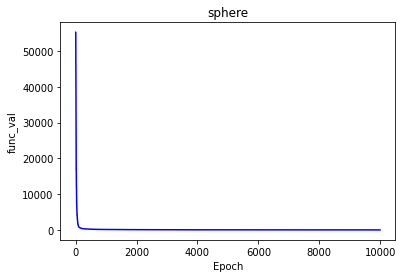

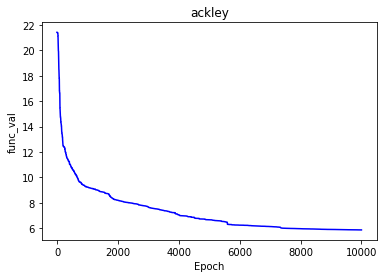

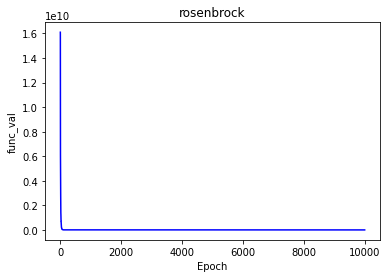

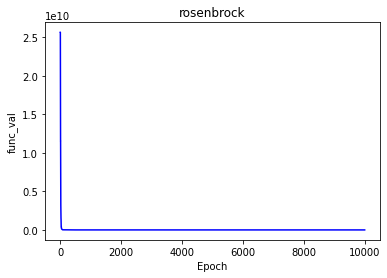

In [8]:
import matplotlib.pyplot as plt

for i in range (his.shape[1]):
    plt.plot(np.arange(len(his)), his[:, i], "blue")
    
    plt.title(tasks[i].__class__.__name__)
    plt.xlabel("Epoch")
    plt.ylabel("func_val")
    plt.show()